In [12]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/04_solvent_chi_pore/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import cm
from matplotlib.colors import Normalize
from create_in import create_in
from out_reader import out_reader

In [13]:
Cs = 0.04

chi_range = np.linspace(1, 2, num = 6)
alpha = 0.35
S = 150

D = 50
N = 300
chi_surf = -0.3

In [14]:
# Функция для вычисления профилей
def compute_profiles(Cs, chi_range, alpha):
    phi_SCF = {}
    for chi in chi_range:
        # Генерируем имя файла и создаем SCF-инпут
        file_name_pro = create_in(
            template_pore='/home/tpopova/prj/PB_SCF/04_solvent_chi_pore/scf_templates/pore_chi.in',
            range_param='chi',
            min_val=0.1,
            max_val=0.1,
            Cs=Cs,
            chi=chi,
            chi_surf=chi_surf,
            D=D,
            N=N,
            S=S,
            alpha=alpha,
        )
        
        # Парсим профили
        phi_brush, phi_end_brush = out_reader(file_names=file_name_pro)
        
        # Сохраняем результаты
        coord = np.arange(D)
        phi_SCF[chi] = (coord, phi_brush)
    return phi_SCF

In [15]:
# Вычисление профилей для разных значений Cs
phi_SCF_alpha_0_3_0_04 = compute_profiles(Cs=Cs, chi_range=chi_range, alpha=alpha)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.061271e+00 |g| = 5.084488e+00 alpha = 1.000000e+00 
hessian scaling: 0.819104
it =  1  E = 1.898732e+00 |g| = 4.745661e+00 alpha = 1.196677e-01 
it =  2  E = 3.334492e+00 |g| = 4.862257e+00 alpha = 3.756690e-02 
it =  3  E = 2.777041e+00 |g| = 4.705854e+00 alpha = 4.904457e-02 
it =  4  E = 3.467363e+00 |g| = 4.278616e+00 alpha = 2.678637e-02 
it =  5  E = 2.505143e+00 |g| = 4.209044e+00 alpha = 4.722227e-02 
it =  6  E = 2.567746e+00 |g| = 3.956119e+00 alpha = 3.953603e-02 
it =  7  E = 2.091604e+00 |g| = 3.798856e+00 alpha = 5.383129e-02 
it =  8  E = 2.104024e+00 |g| = 3.548112e+00 alpha = 4.682903e-02 
it =  9  E = 1.852217e+00 |g| = 3.468922e+00 alpha = 5.605015e-02 
it =  10  E = 1.816317e+00 |g| = 3.127264e+0

<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2285755/3149588356.py:12: SyntaxWarning: invalid escape sequence '\c'
  axes.plot(coord, phi_brush, label=f"$\chi$ = {chi}", color=color, linewidth=3)


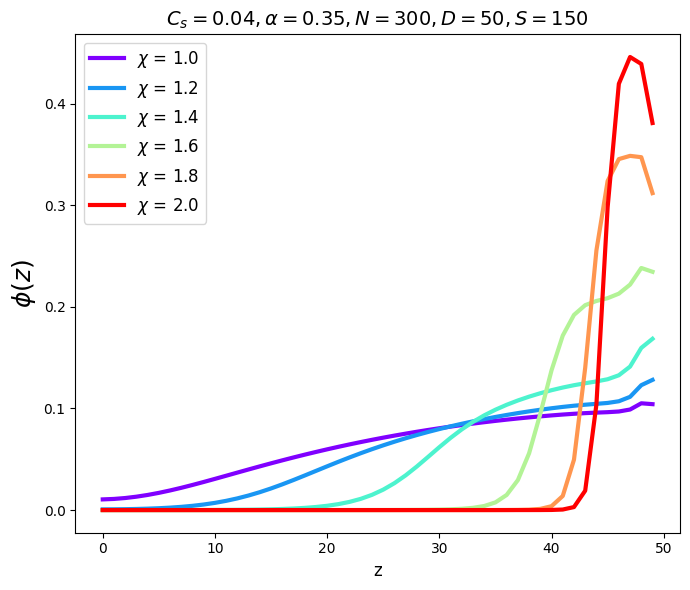

In [ ]:
# Построение графика для Cs = 0.04
fig, axes = plt.subplots(figsize=(7, 6))  # Один график

# Количество кривых для нормализации цветов
norm = Normalize(vmin=min(chi_range), vmax=max(chi_range))  # Нормализуем диапазон для палитры
cmap = cm.rainbow  # Используем палитру plasma

# График для Cs = 0.04
axes.set_title(f"$C_s = {Cs}, \\alpha = {alpha}, N = {N}, D = {D}, S = {S}$", fontsize=14)
for i, (chi, (coord, phi_brush)) in enumerate(phi_SCF_alpha_0_3_0_04.items()):
    color = cmap(norm(chi))  # Получаем цвет из палитры plasma
    axes.plot(coord, phi_brush, label=f"$\chi$ = {chi}", color=color, linewidth=3)
axes.set_xlabel("z", fontsize=12)
axes.set_ylabel(r"$\phi(z)$", fontsize=18)
axes.legend(fontsize=12)

# Настройки и отображение
plt.tight_layout()
# plt.savefig('var_chi_cs.pdf', dpi=300, bbox_inches='tight')
plt.show()